# Análise Exploratória de Dados (AED)

Uma análise exploratória de dados (AED) simples utilizando o conjunto de dados da Uber disponibilizado no Kaggle, intitulado “uber-ride-analytics-dashboard”, disponível no endereço eletrônico:
https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard/data

### Objetivo inicial:
A análise deverá buscar explorar os dados de forma que seja possível compreender padrões de utilização do serviço, variações temporais, características das corridas e/ou demais informações (de escolha do estudante) relevantes presentes no conjunto de dados.

### Condição de sucesso no projeto:
A AED deverá permitir a compreensão das principais características do conjunto de dados, bem como de seus padrões e variáveis relevantes. Essa compreensão possibilita que, em um momento futuro, esses dados possam ser utilizados, total ou parcialmente, em um contexto introdutório de Inteligência Artificial, como em tarefas de classificação ou regressão.


### Importação das bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


### Carregamento dos dados

In [6]:
df = pd.read_csv("ncr_ride_bookings.csv")

df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


### Entendimento inicial

In [ ]:
df.shape

(150000, 21)

In [10]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [12]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [13]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

### Engenharia temporal

In [14]:
# transformar data
df["datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])

# extrair features temporais
df["hour"] = df["datetime"].dt.hour
df["day_of_week"] = df["datetime"].dt.day_name()
df["month"] = df["datetime"].dt.month

### Distribuição geral das corridas

#### Corridas por hora

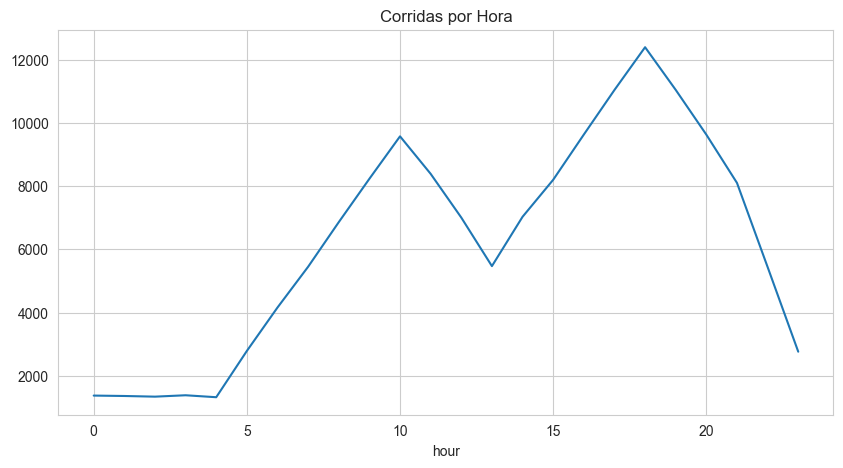

In [15]:
df.groupby("hour").size().plot(kind="line", figsize=(10,5))
plt.title("Corridas por Hora")
plt.show()


#### Corridas por dia da semana

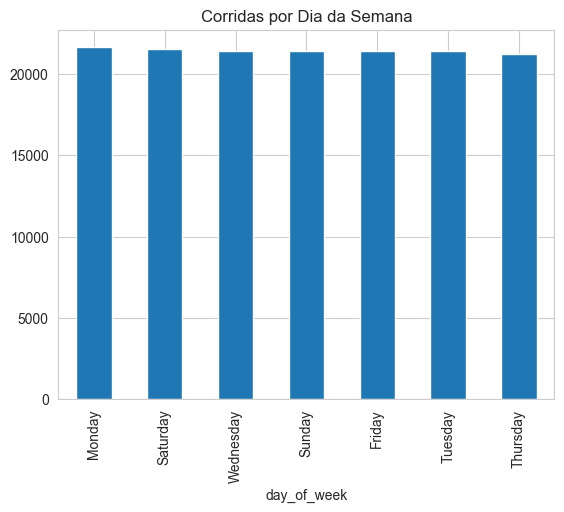

In [16]:
df["day_of_week"].value_counts().plot(kind="bar")
plt.title("Corridas por Dia da Semana")
plt.show()


### Tipos de veículos

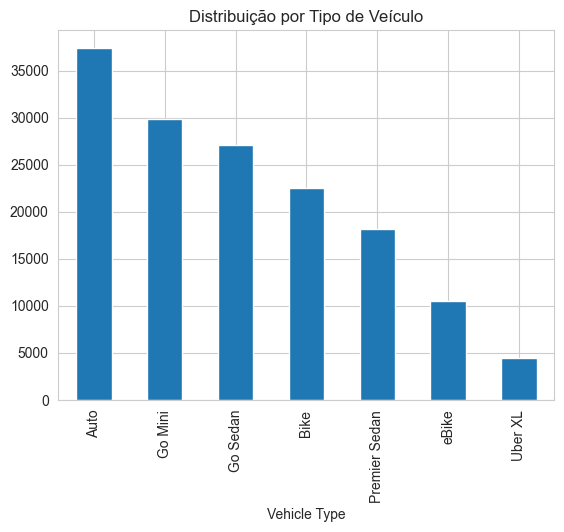

In [17]:
df["Vehicle Type"].value_counts().plot(kind="bar")
plt.title("Distribuição por Tipo de Veículo")
plt.show()


### Receita média

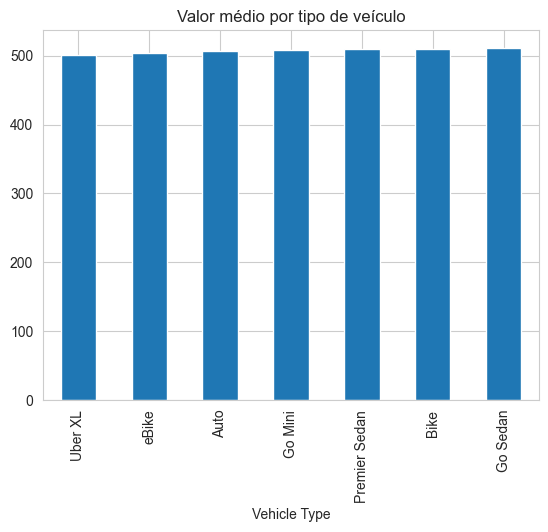

In [18]:
df.groupby("Vehicle Type")["Booking Value"].mean().sort_values().plot(kind="bar")
plt.title("Valor médio por tipo de veículo")
plt.show()


### Cancelamentos

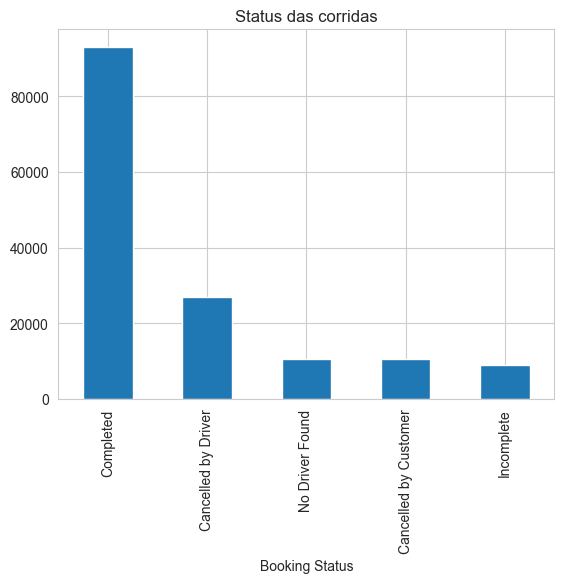

In [19]:
df["Booking Status"].value_counts().plot(kind="bar")
plt.title("Status das corridas")
plt.show()



### Avaliações

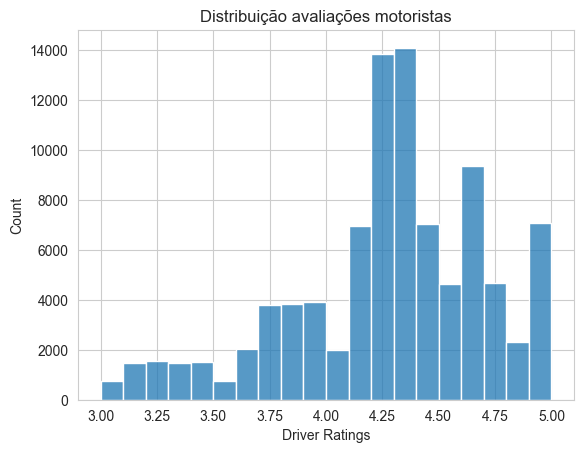

In [20]:
sns.histplot(df["Driver Ratings"].dropna(), bins=20)
plt.title("Distribuição avaliações motoristas")
plt.show()


### Heatmap temporal (hora x dia da semana)

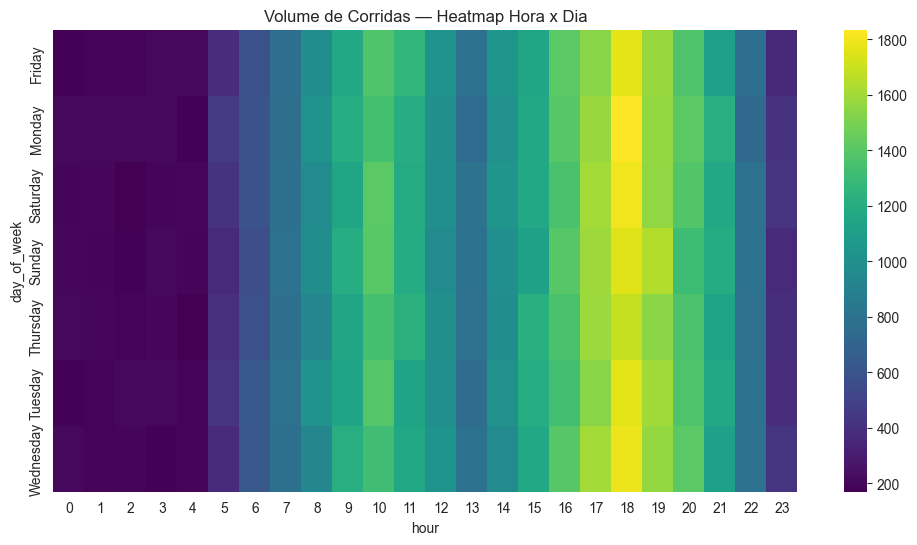

In [22]:
pivot = df.pivot_table(
    index="day_of_week",
    columns="hour",
    values="Booking ID",
    aggfunc="count"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="viridis")
plt.title("Volume de Corridas — Heatmap Hora x Dia")
plt.show()


### Cancelamentos por tipo de veículo

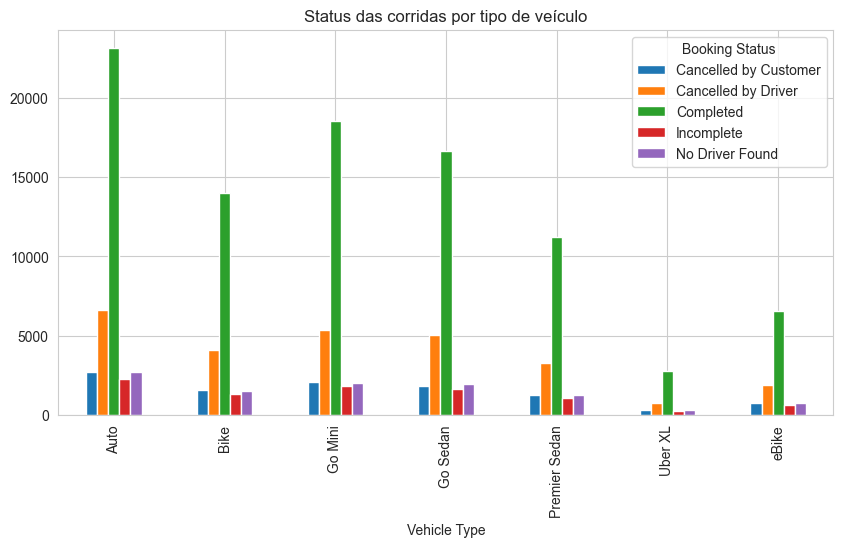

In [23]:
cancel_vehicle = pd.crosstab(
    df["Vehicle Type"],
    df["Booking Status"]
)

cancel_vehicle.plot(kind="bar", figsize=(10,5))
plt.title("Status das corridas por tipo de veículo")
plt.show()


### Distribuição valor vs distância

Existe relação linear entre distância e preço?

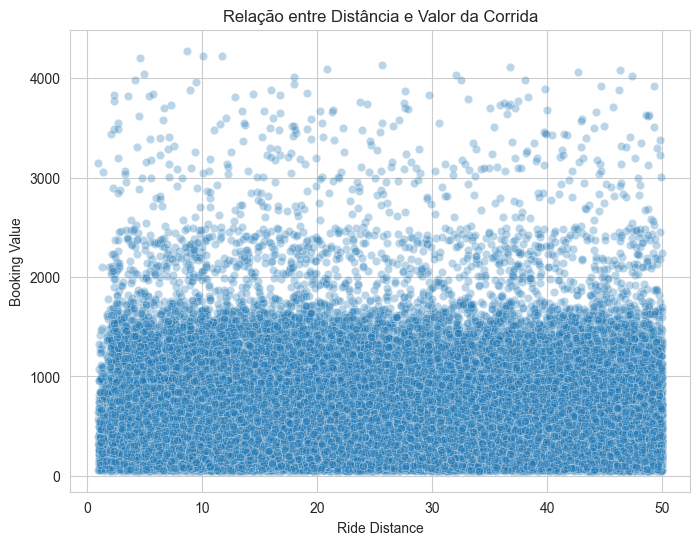

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Ride Distance",
    y="Booking Value",
    alpha=0.3
)

plt.title("Relação entre Distância e Valor da Corrida")
plt.show()


### Tipo de Veículo

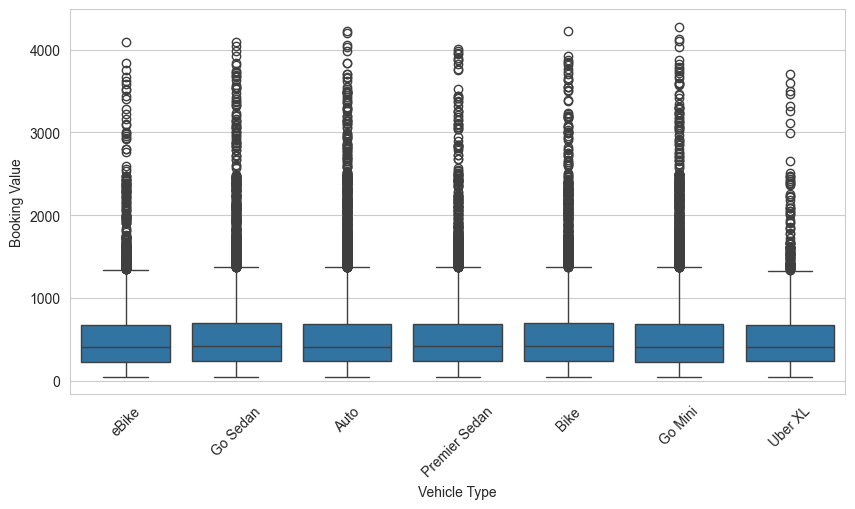

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Vehicle Type", y="Booking Value")
plt.xticks(rotation=45)
plt.show()


#### Possíveis aplicações IA

- Previsão de demanda por horário (regressão)
- Classificação de cancelamentos
- Recomendação de veículos
